In [1]:
# dependancies and setup
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
import datetime
import calendar

In [2]:
# import csv
cyber_data = pd.read_csv('source_data/cyber_data_clean.csv')
cyber_data.head()

,Unnamed: 0,Breach ID,State,Year,Full Date
0,1054,725,TX,2012,2012-12-27
1,1053,438,CA,2011,2011-12-22
2,1052,818,MO,2009,2009-12-21
3,1050,676,MA,2012,2012-12-15
4,1049,638,CA,2012,2012-12-10


In [3]:
# drop unneeded column
cyber_data = cyber_data.drop(['Unnamed: 0'], axis=1)

# add month column
cyber_data['Month'] = pd.DatetimeIndex(cyber_data['Full Date']).month
cyber_data['Month'] = cyber_data['Month'].apply(lambda x: calendar.month_abbr[x])
cyber_data.head()

,Breach ID,State,Year,Full Date,Month
0,725,TX,2012,2012-12-27,Dec
1,438,CA,2011,2011-12-22,Dec
2,818,MO,2009,2009-12-21,Dec
3,676,MA,2012,2012-12-15,Dec
4,638,CA,2012,2012-12-10,Dec


**Where did the most & least data breaches occur?**

In [12]:
# group data and count breach occurances
# sort values so that the max is at the top and min is last
state_breach_count = pd.DataFrame(cyber_data.groupby(['State'])['Breach ID'].count().sort_values(ascending=False))
state_breach_count.head()

,Breach ID
State,
CA,113
TX,83
FL,66
NY,58
IL,49


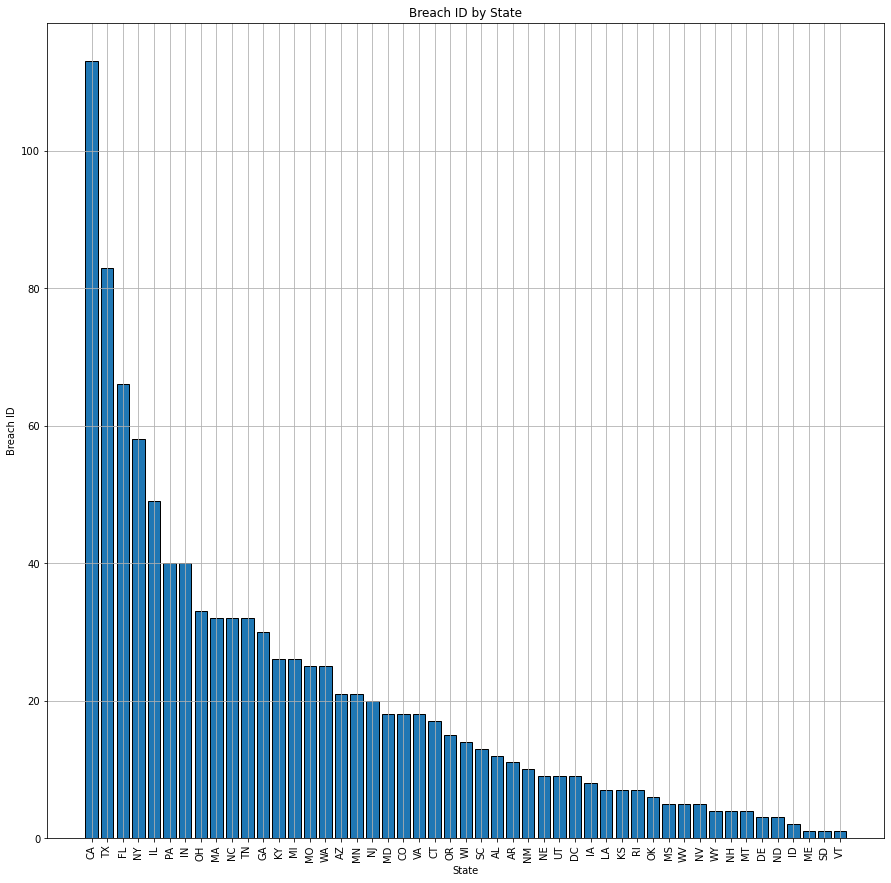

In [25]:
plt.figure(figsize = (15,15)) 
plt.bar(state_breach_count.index, state_breach_count['Breach ID'], edgecolor = 'k')
plt.title('Breach ID by State')
plt.xlabel('State')
plt.ylabel('Breach ID')
tick_locations = [value for value in state_breach_count.index]
plt.xticks(tick_locations, rotation="vertical")
plt.grid()
plt.show()

## BARCHART OF STATES & BREACH COUNT

In [5]:
# use describe to identify min/max values for boolean then convert to int
st_breach_max = int(state_breach_count.describe().max()) 
st_breach_min = int(state_breach_count.describe().min())
state_breach_count.describe()

,Breach ID
count,49.000000
mean,20.775510
std,22.186957
min,1.000000
25%,6.000000
50%,14.000000
75%,26.000000
max,113.000000


In [6]:
# isolate the max state
state_breach_count[state_breach_count['Breach ID']==st_breach_max]
state_breach_count.head()

,Breach ID
State,
CA,113
TX,83
FL,66
NY,58
IL,49


In [7]:
#isolate the min state
state_breach_count[state_breach_count['Breach ID']==st_breach_min]

,Breach ID
State,
ME,1
SD,1
VT,1


In [8]:
# group data by state , month, year to define datat for plot over time
state_yr_breach = cyber_data.groupby(['Year','State'])['Breach ID'].count().sort_values()
state_yr_breach = pd.DataFrame(state_yr_breach.reset_index())
state_yr_breach.columns = ['Year', 'State', 'Breach Count']
state_yr_breach.head()

,Year,State,Breach Count
0,1997,NC,1
1,2012,SC,1
2,2012,NV,1
3,2012,NE,1
4,2012,MT,1


In [30]:
cyber_data['Year'].sort_values(ascending=False)
yr_breach_count = pd.DataFrame(cyber_data.groupby(['Year'])['Breach ID'].count())                              
yr_breach_count = yr_breach_count.rename(columns={'Breach ID': 'Breach Count'}) 
yr_breach_count.reset_index()
yr_breach_count.head()

,Breach Count
Year,
1997,1
2002,1
2003,1
2004,2
2005,2


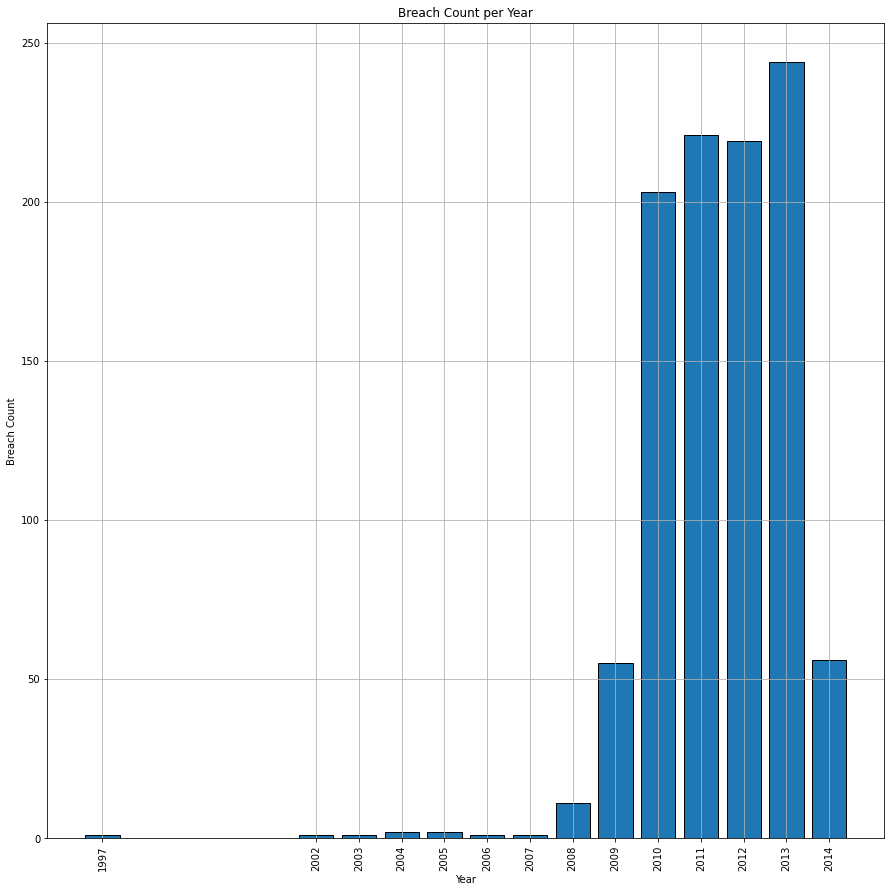

In [32]:
plt.figure(figsize = (15,15)) 
plt.bar(yr_breach_count.index, yr_breach_count['Breach Count'], edgecolor = 'k')
plt.title('Breach Count per Year')
plt.xlabel('Year')
plt.ylabel('Breach Count')
tick_locations = [value for value in yr_breach_count.index]
plt.xticks(tick_locations, rotation="vertical")
plt.grid()
plt.show()

# BARCHART CHART HERE YEAR AND BREACH COUNT

In [ ]:
# get quartiles of Breach count per year
# (q1,q2,q3) = yr_breach_count['Breach Count'].quantile([.25, .5, .75])
# find upper and lower bounds
# mean =  yr_breach_count['Breach Count'].mean()
# iqr = q3 - q1
# low_bound = q1 - (1.5*iqr)
# upr_bound = q3 + (1.5*iqr)

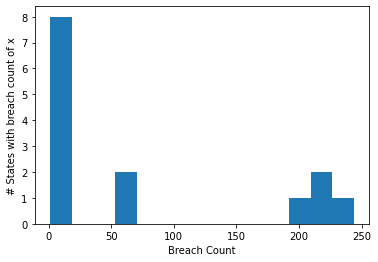

In [10]:
# look at overall data distribution
len_brch = len(yr_breach_count['Breach Count'])
plt.hist(yr_breach_count['Breach Count'], bins=len_brch)
plt.xlabel('Breach Count')
plt.ylabel('# States with breach count of x')
plt.show()
# looks very abnormal

## Isolate data to most occurances of data breaches

In [11]:
# pull only the data points that are in tX & CA
tx_breaches = top_breach_states.loc[(cyber_data['State']=='TX')]['Breach ID']
ca_breaches = top_breach_states.loc[(cyber_data['State']=='CA')]['Breach ID']

NameError: name 'top_breach_states' is not defined

----
# **Fire Data** 

In [ ]:
# pull in fire data from API results
firedf = pd.read_csv('source_data/disaster_data.csv')
firedf.head()

In [ ]:
# add month and yr columns
firedf['month'] = pd.DatetimeIndex(firedf['date']).month
firedf['year'] = pd.DatetimeIndex(firedf['date']).year
firedf.head()

In [ ]:
# change month # to month name
firedf['month'] = firedf['month'].apply(lambda x: calendar.month_abbr[x])
firedf.head()

In [ ]:
# group data and count breach occurances
# sort values so that the max is at the top and min is last
st_fire_count = pd.DataFrame(firedf.groupby(['state'])['dis_id'].count().sort_values(ascending=False))

# use describe to identify min/max values for boolean then convert to int
st_fire_max = int(st_fire_count.describe().max()) 
st_fire_min = int(st_fire_count.describe().min())
st_fire_count.describe()

In [ ]:
# isolate the max state
st_fire_count[st_fire_count['dis_id']==st_fire_max]
st_fire_count.head(3)

In [ ]:
tx_breaches = top_breach_states.loc[(cyber_data['State']=='TX')].sort_values('')